# Object Detection with YOLOv8

In [ ]:
import cv2
from ultralytics import YOLO

CONFIDENCE_THRESHOLD = 0.7

cam_index = 0 #내장 캠

cap = cv2.VideoCapture(cam_index)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)   

GREEN = (0, 255, 0)
WHITE = (255, 255, 255)

with open('coco128.txt', 'r', encoding='utf8') as coco128:
    data = coco128.read()
    class_list = data.split('\n')

while True:
    ret, frame = cap.read()
    if not ret:
        print('Cam Error')
        break

    model = YOLO('yolov8n.pt')
    detection = model(frame)[0]
    
    for data in detection.boxes.data.tolist():
        confidence = float(data[4])
        if confidence < CONFIDENCE_THRESHOLD:
            continue
    
        xmin, ymin, xmax, ymax = int(data[0]), int(data[1]), int(data[2]), int(data[3])
        label = int(data[5])
        cv2.rectangle(frame, (xmin, ymin), (xmax, ymax), GREEN, 2)
        cv2.putText(frame, class_list[label]+' '+str(round(confidence, 2))+'%', (xmin, ymin), cv2.FONT_ITALIC, 1, WHITE, 2)

    cv2.imshow('frame', frame)

    if cv2.waitKey(1) == ord('q'):
        break

# YOLOv8 classifier model custom dataset training

In [ ]:
from ultralytics import YOLO
# import torch

model = YOLO('yolov8s-cls.yaml')
model = YOLO('yolov8s-cls.pt')

model.train(data='/custom_cls/', epochs=20)

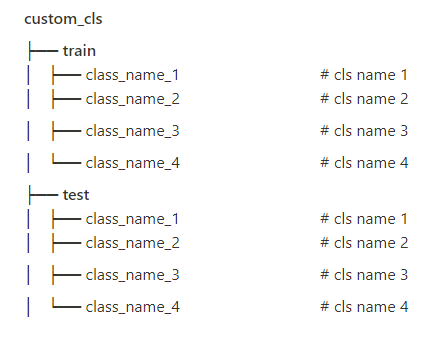  
  
훈련 결과 : ./runs/classify/train/weights/best.pt  
  
### 모델 테스트

In [ ]:
results = model(image) 
# image에는 image path 또는 numpy array형식 이미지 입력
    for result in results:
        probs = list(result.probs)
        classes = result.names

        highest_prob = max(probs)
        highest_prob_index = probs.index(highest_prob)

        print(f"class: {classes[highest_prob_index]}({highest_prob * 100:.2f}%)")

# YOLOv8 Detector custom dataset training  
  
YOLO Detector 훈련을 위해서는, train에 사용되는 .yaml file을 작성해야 한다.  
  
coco128.yaml file을 참고하였는데, 구성은 다음과 같다.  
  
names:  
	0: red  
	1: green  
test: /tld_sample/test/  
train: /tld_sample/train/  
val: /tld_sample/valid/  
  
  


names에는 0 ~ N의 라벨과 라벨 명을 적고,  
  
train, val, test에는 각각의 폴더 경로(절대 경로)를 적으면 된다.  

In [ ]:
import yaml

data = {
    "train" : '/tld_sample/train/',
        "val" : '/tld_sample/valid/',
        # "test" : '/tld_sample/test/', optional 
        "names" : {0 : 'red', 1 : 'green'}}

with open('./tld.yaml', 'w') as f :
    yaml.dump(data, f)

# check written file
with open('./tld.yaml', 'r') as f :
    lines = yaml.safe_load(f)
    print(lines)

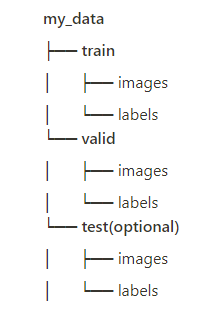  
  


In [ ]:
from ultralytics import YOLO

model = YOLO('yolov8s.pt')

model.train(data='./tld.yaml' , epochs=20)

학습 실행 결과는 runs/detect/train에 best.pt, last.pt로 저장  
  
### 새로운 이미지에 성능 테스트

In [ ]:
import cv2
from ultralytics import YOLO

# model = YOLO('yolov8s.pt')

model = YOLO('./runs/detect/train7/weights/best.pt')
results = model('./red_light_test.jpg') # conf=0.2, iou ..

plots = results[0].plot()
cv2.imshow("plot", plots)
cv2.waitKey(0)
cv2.destroyAllWindows()